In [1]:
! pip install darts

**1. read different files**
2. **2 different series**, **series_ai** **has retweet_count only**, **series_followe_count** has retweet_count and follower_count


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
series_ai = pd.read_csv('ai_merged.csv')
series_follower_count =pd.read_csv('ai_merged.csv')
series_ai.drop(['follower_count', 'quote_count','reply_count','favorite_count','lang','profile_country','tweet_type'], axis='columns', inplace=True) 
series_follower_count.drop (['quote_count','reply_count','favorite_count','lang','profile_country','tweet_type'],axis='columns', inplace=True)

#series_ai_retweet = series_ai.squeeze()
#series_ai_retweet.plot(label='Plot ')
#plt.legend();
#series_ai_retweet

1. normalizing the different datasets
2. series_Ai_retweet --> only retweet_counts
3. series_follower_count --> only follower_count


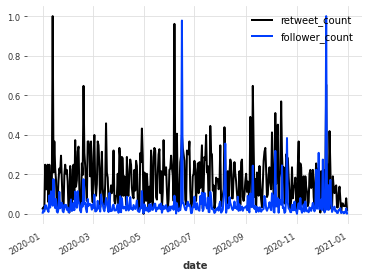

In [3]:
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
scaler_ai_retweet = Scaler()
scaler_follower_count = Scaler()
series_ai_retweet = scaler_ai_retweet.fit_transform(
        TimeSeries.from_dataframe(
            series_ai, 'date', ['retweet_count'])
    )
series_follower_count =  scaler_follower_count.fit_transform(
        TimeSeries.from_dataframe(
            series_follower_count, 'date', ['follower_count'])
    ) 
series_ai_retweet.plot(label ='retweet_count')
series_follower_count.plot(label ='follower_count')
plt.legend();

**1. splitting the data into train and validation(9 month for train, 3 month for validation)**

In [4]:
#train_retweet, val_retweet = series_ai_retweet[0:8], series_ai_retweet[8:]
train_retweet, val_retweet = series_ai_retweet.split_after(pd.Timestamp('20200930'))

In [5]:
train_follower, val_follower = series_follower_count.split_after(pd.Timestamp('20200930'))

In [6]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [13]:
dic_chunk_length = [[24,12],[24,24],[30,7],[60,7],[14,14],[30,30],[60,30]]
print(dic_chunk_length[1][1])

24


**Generic n-beats model retweet only** 

In [17]:
errors ={}
best_error = 1000
preds = {} 

for length_paramter in dic_chunk_length:
  model_ai_retweet= NBEATSModel(input_chunk_length = length_paramter[0] , output_chunk_length= length_paramter[1], n_epochs=100, random_state=0)
  model_ai_retweet.fit([train_retweet],val_series = val_retweet, verbose=True)
  pred = model_ai_retweet.predict(n=36, series = train_retweet )
  error = mape(val_retweet[:36],pred)
  print(error)
  if error < best_error:
    best_error = error
  key_name = 'input_'+ str(length_paramter[0]) +'_output_'+str(length_paramter[1])
  errors[key_name] = error
  preds[key_name] = pred 
print(errors)



[2021-09-30 16:45:45,355] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 239 samples.
[2021-09-30 16:45:45,355] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 239 samples.
[2021-09-30 16:45:45,458] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-30 16:45:45,458] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:03<05:09,  3.12s/it]

 11%|█         | 11/100 [00:26<03:56,  2.65s/it]

 21%|██        | 21/100 [00:51<03:17,  2.50s/it]

 31%|███       | 31/100 [01:16<02:58,  2.59s/it]

 41%|████      | 41/100 [01:42<02:33,  2.59s/it]

 51%|█████     | 51/100 [02:05<01:59,  2.43s/it]

 61%|██████    | 61/100 [02:30<01:36,  2.47s/it]

 71%|███████   | 71/100 [02:55<01:13,  2.53s/it]

 81%|████████  | 81/100 [03:20<00:47,  2.50s/it]

 91%|█████████ | 91/100 [03:45<00:21,  2.42s/it]

100%|██████████| 100/100 [04:07<00:00,  2.47s/it]
[2021-09-30 16:49:52,973] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 227 samples.
[2021-09-30 16:49:52,973] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 227 samples.
[2021-09-30 16:49:53,067] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-30 16:49:53,067] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


167.6558954964547


  1%|          | 1/100 [00:06<10:23,  6.30s/it]

 11%|█         | 11/100 [00:35<05:09,  3.48s/it]

 21%|██        | 21/100 [01:00<03:15,  2.47s/it]

 31%|███       | 31/100 [01:25<02:44,  2.39s/it]

 41%|████      | 41/100 [01:52<02:51,  2.91s/it]

 51%|█████     | 51/100 [02:20<03:04,  3.77s/it]

 61%|██████    | 61/100 [02:46<01:35,  2.44s/it]

 71%|███████   | 71/100 [03:09<01:08,  2.37s/it]

 81%|████████  | 81/100 [03:32<00:43,  2.28s/it]

 91%|█████████ | 91/100 [03:55<00:21,  2.34s/it]

100%|██████████| 100/100 [04:16<00:00,  2.57s/it]
[2021-09-30 16:54:10,597] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 238 samples.
[2021-09-30 16:54:10,597] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 238 samples.
[2021-09-30 16:54:10,695] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-30 16:54:10,695] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


194.9575987446413


  1%|          | 1/100 [00:05<08:43,  5.28s/it]

 11%|█         | 11/100 [00:35<05:25,  3.66s/it]

 21%|██        | 21/100 [01:02<03:11,  2.43s/it]

 31%|███       | 31/100 [01:26<02:50,  2.47s/it]

 41%|████      | 41/100 [01:51<02:21,  2.39s/it]

 51%|█████     | 51/100 [02:16<02:05,  2.55s/it]

 61%|██████    | 61/100 [02:43<01:47,  2.75s/it]

 71%|███████   | 71/100 [03:05<01:08,  2.35s/it]

 81%|████████  | 81/100 [03:30<00:46,  2.43s/it]

 91%|█████████ | 91/100 [03:57<00:24,  2.73s/it]

100%|██████████| 100/100 [04:18<00:00,  2.58s/it]
[2021-09-30 16:58:29,524] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-09-30 16:58:29,524] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-09-30 16:58:29,607] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-30 16:58:29,607] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


134.89179810754277


  1%|          | 1/100 [00:06<10:50,  6.57s/it]

 11%|█         | 11/100 [00:37<05:29,  3.70s/it]

 21%|██        | 21/100 [01:04<03:29,  2.66s/it]

 31%|███       | 31/100 [01:29<02:57,  2.57s/it]

 41%|████      | 41/100 [01:55<02:34,  2.61s/it]

 51%|█████     | 51/100 [02:21<02:07,  2.60s/it]

 61%|██████    | 61/100 [02:47<01:42,  2.64s/it]

 71%|███████   | 71/100 [03:13<01:14,  2.55s/it]

 81%|████████  | 81/100 [03:39<00:48,  2.57s/it]

 91%|█████████ | 91/100 [04:09<00:23,  2.62s/it]

100%|██████████| 100/100 [04:30<00:00,  2.70s/it]
[2021-09-30 17:02:59,962] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247 samples.
[2021-09-30 17:02:59,962] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 247 samples.
[2021-09-30 17:03:00,056] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-30 17:03:00,056] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


109.54325454306795


  1%|          | 1/100 [00:04<06:44,  4.09s/it]

 11%|█         | 11/100 [00:33<05:15,  3.55s/it]

 21%|██        | 21/100 [00:59<03:22,  2.56s/it]

 31%|███       | 31/100 [01:23<02:57,  2.57s/it]

 41%|████      | 41/100 [01:47<02:22,  2.41s/it]

 51%|█████     | 51/100 [02:11<01:59,  2.43s/it]

 61%|██████    | 61/100 [02:36<01:36,  2.47s/it]

 71%|███████   | 71/100 [03:00<01:11,  2.47s/it]

 81%|████████  | 81/100 [03:25<00:47,  2.49s/it]

 91%|█████████ | 91/100 [03:49<00:22,  2.53s/it]

100%|██████████| 100/100 [04:11<00:00,  2.52s/it]
[2021-09-30 17:07:12,147] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 215 samples.
[2021-09-30 17:07:12,147] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 215 samples.
[2021-09-30 17:07:12,238] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-30 17:07:12,238] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


176.6523663791824


  1%|          | 1/100 [00:03<06:08,  3.72s/it]

 11%|█         | 11/100 [00:33<05:15,  3.54s/it]

 21%|██        | 21/100 [01:03<04:39,  3.54s/it]

 31%|███       | 31/100 [01:29<02:58,  2.58s/it]

 41%|████      | 41/100 [01:57<03:30,  3.56s/it]

 51%|█████     | 51/100 [02:23<02:03,  2.53s/it]

 61%|██████    | 61/100 [02:48<01:42,  2.62s/it]

 71%|███████   | 71/100 [03:13<01:12,  2.52s/it]

 81%|████████  | 81/100 [03:38<00:48,  2.53s/it]

 91%|█████████ | 91/100 [04:02<00:21,  2.34s/it]

100%|██████████| 100/100 [04:25<00:00,  2.66s/it]
[2021-09-30 17:11:38,169] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2021-09-30 17:11:38,169] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2021-09-30 17:11:38,260] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-30 17:11:38,260] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.


134.8347331712407


  1%|          | 1/100 [00:07<11:35,  7.02s/it]

 11%|█         | 11/100 [00:35<05:11,  3.50s/it]

 21%|██        | 21/100 [01:05<03:42,  2.82s/it]

 31%|███       | 31/100 [01:29<03:11,  2.77s/it]

 41%|████      | 41/100 [01:58<03:48,  3.87s/it]

 51%|█████     | 51/100 [02:24<02:08,  2.63s/it]

 61%|██████    | 61/100 [02:50<01:44,  2.67s/it]

 71%|███████   | 71/100 [03:16<01:16,  2.63s/it]

 81%|████████  | 81/100 [03:42<00:48,  2.57s/it]

 91%|█████████ | 91/100 [04:07<00:22,  2.54s/it]

100%|██████████| 100/100 [04:31<00:00,  2.72s/it]


144.713234572246
{'input_24_output_12': 167.6558954964547, 'input_24_output_24': 194.9575987446413, 'input_30_output_7': 134.89179810754277, 'input_60_output_7': 109.54325454306795, 'input_14_output_14': 176.6523663791824, 'input_30_output_30': 134.8347331712407, 'input_60_output_30': 144.713234572246}


**Generic model on retweet and follower count **



In [9]:
model_ai_multiple = NBEATSModel(input_chunk_length=60, output_chunk_length=7, n_epochs=100, random_state=0)
model_ai_multiple.fit([train_retweet,train_follower],val_series = [val_retweet,val_follower], verbose=True)
pred_retweet = model_ai_multiple.predict(n=36, series = train_retweet )
pred_follower = model_ai_multiple.predict(n=36, series = train_follower )
error_retweet = mape(val_retweet[:36],pred_retweet)
#error_follower = mape(val_follower[:36],pred_follower)
print("this is the error for the retweet for the multiple:",error_retweet )
#print("this is the error for the follower for the multiple:",error_follower ) 



[2021-10-01 14:22:44,671] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 416 samples.
[2021-10-01 14:22:44,671] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 416 samples.
[2021-10-01 14:22:44,762] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-01 14:22:44,762] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:04<06:45,  4.09s/it]

 11%|█         | 11/100 [00:35<04:57,  3.34s/it]

 21%|██        | 21/100 [01:06<04:07,  3.13s/it]

 31%|███       | 31/100 [01:37<03:30,  3.05s/it]

 41%|████      | 41/100 [02:07<03:01,  3.07s/it]

 51%|█████     | 51/100 [02:37<02:28,  3.02s/it]

 61%|██████    | 61/100 [03:07<01:58,  3.04s/it]

 71%|███████   | 71/100 [03:38<01:28,  3.04s/it]

 81%|████████  | 81/100 [04:08<00:57,  3.03s/it]

 91%|█████████ | 91/100 [04:38<00:27,  3.03s/it]

100%|██████████| 100/100 [05:05<00:00,  3.06s/it]

this is the error for the retweet for the multiple: 124.02684167355409


**Not_generic_models**  

In [10]:
model_ai_retweet_not_generic = NBEATSModel(input_chunk_length=60, output_chunk_length=7, n_epochs=100, random_state=0,
                                           generic_architecture=False)
model_ai_retweet_not_generic.fit([train_retweet],val_series = [val_retweet], verbose=True)
pred_retweet = model_ai_retweet_not_generic.predict(n=36, series = train_retweet )
#pred_follower = model_ai_multiple.predict(n=36, series = train_follower )
error_retweet = mape(val_retweet[:36],pred_retweet)
#error_follower = mape(val_follower[:36],pred_follower)
print("this is the error for the retweet for the multiple:",error_retweet )



[2021-10-01 14:34:36,060] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-10-01 14:34:36,060] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-10-01 14:34:36,141] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-01 14:34:36,141] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  2%|▏         | 2/100 [00:00<00:18,  5.34it/s]

 12%|█▏        | 12/100 [00:01<00:11,  7.43it/s]

 22%|██▏       | 22/100 [00:03<00:10,  7.53it/s]

 32%|███▏      | 32/100 [00:04<00:08,  7.70it/s]

 42%|████▏     | 42/100 [00:05<00:08,  7.13it/s]

 52%|█████▏    | 52/100 [00:07<00:06,  7.30it/s]

 62%|██████▏   | 62/100 [00:08<00:04,  7.76it/s]

 72%|███████▏  | 72/100 [00:09<00:03,  7.90it/s]

 82%|████████▏ | 82/100 [00:11<00:02,  7.81it/s]

 92%|█████████▏| 92/100 [00:12<00:01,  7.83it/s]

100%|██████████| 100/100 [00:13<00:00,  7.45it/s]

this is the error for the retweet for the multiple: 141.99571380998003


In [11]:
model_ai_retweet_not_generic_multiple = NBEATSModel(input_chunk_length=60, output_chunk_length=7, n_epochs=100, random_state=0,
                                           generic_architecture=False)
model_ai_retweet_not_generic_multiple.fit([train_retweet,train_follower],val_series = [val_retweet,val_follower], verbose=True)
pred_retweet = model_ai_retweet_not_generic_multiple.predict(n=36, series = train_retweet )
#pred_follower = model_ai_multiple.predict(n=36, series = train_follower )
error_retweet = mape(val_retweet[:36],pred_retweet)
#error_follower = mape(val_follower[:36],pred_follower)
print("this is the error for the retweet for the multiple:",error_retweet )

[2021-10-01 14:43:11,849] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 416 samples.
[2021-10-01 14:43:11,849] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 416 samples.
[2021-10-01 14:43:11,867] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-10-01 14:43:11,867] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:00<00:32,  3.08it/s]

 11%|█         | 11/100 [00:02<00:21,  4.18it/s]

 21%|██        | 21/100 [00:04<00:18,  4.26it/s]

 31%|███       | 31/100 [00:07<00:15,  4.54it/s]

 41%|████      | 41/100 [00:09<00:13,  4.50it/s]

 51%|█████     | 51/100 [00:11<00:12,  4.04it/s]

 61%|██████    | 61/100 [00:13<00:08,  4.47it/s]

 71%|███████   | 71/100 [00:16<00:06,  4.21it/s]

 81%|████████  | 81/100 [00:18<00:04,  4.21it/s]

 91%|█████████ | 91/100 [00:20<00:02,  4.49it/s]

100%|██████████| 100/100 [00:22<00:00,  4.41it/s]

this is the error for the retweet for the multiple: 139.9542033706626


<TimeSeries (DataArray) (time: 36, component: 1, sample: 1)>
array([[[0.20665863]],

       [[0.11380305]],

       [[0.06329727]],

       [[0.30711526]],

       [[0.27850962]],

       [[0.22991745]],

       [[0.31369417]],

       [[0.13607024]],

       [[0.18052878]],

       [[0.06059244]],

...

       [[0.17601215]],

       [[0.20984553]],

       [[0.20148539]],

       [[0.2072057 ]],

       [[0.20790126]],

       [[0.1023231 ]],

       [[0.18556456]],

       [[0.1256973 ]],

       [[0.20833077]],

       [[0.30531894]]])
Coordinates:
  * time       (time) datetime64[ns] 2020-10-01 2020-10-02 ... 2020-11-05
  * component  (component) object 'retweet_count'
Dimensions without coordinates: sample
MAPE = 108.56%


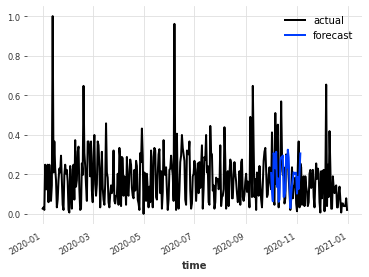

In [17]:
pred = model_ai_retweet.predict(n=36, series = train_retweet )
series_ai_retweet.plot(label='actual')
#val_retweet.plot(label= 'validation')

pred.plot(label='forecast')
plt.legend();
print(pred)
print('MAPE = {:.2f}%'.format(mape(series_ai_retweet, pred)))